# Imports

In [1]:
import numpy as np
import pandas as pan

import matplotlib.pyplot as plt

import os
from datetime import datetime

# Example

# Combining Files

In [2]:
df = pan.DataFrame()
ini = False
progress = 0
numberOfFiles = 10
for root, dirs, files in os.walk('E:\Master Data\TMA_google_dataset'):# data not part of repository(too much data)
    for file in sorted(files):
        path = root + '\\' + file
        if str(path).endswith('.csv'):
            print(progress)
            if not ini:
                df = pan.read_csv(str(path))
                ini = True
            else:
                tempDf = pan.read_csv(str(path))
                df = pan.concat([df,tempDf])
            progress += 1
        if progress == numberOfFiles:
            break
    if progress == numberOfFiles:
        break
print(df)

0
1
2
3
4
5
6
7
8
9
         timestamp           q_src   q_as q_geoip  ecs_ip_as ecs_ip_geoip  \
0       1435330386    74.125.47.17  15169      US      16276           FR   
1       1435330386    74.125.47.20  15169      US      16276           FR   
2       1435330386    74.125.47.84  15169      US       9143           NL   
3       1435330386   173.194.90.19  15169      US      13711           US   
4       1435330386   74.125.181.84  15169      BE      16276           FR   
5       1435330387   74.125.181.86  15169      BE      16276           FR   
6       1435330387    74.125.73.17  15169      US        786           GB   
7       1435330387    74.125.47.16  15169      US      12876           FR   
8       1435330387   74.125.181.80  15169      BE       5089           GB   
9       1435330387    74.125.73.16  15169      US       3269           IT   
10      1435330387    74.125.74.80  15169      US      57781           RU   
11      1435330387   74.125.181.81  15169      BE      2

In [3]:
df_count_country = df.groupby(['timestamp','ecs_ip_geoip']).count() #Goup the data by timestep and country

df_requestsPerCountry = df_count_country['q_src'].unstack().fillna(0) #count all traces per country per timestep

df_overallSum = df_requestsPerCountry.sum() #count all traces per country

df_overallSum.sort_values(inplace = True) #sort the overall sum by size

# Replacing Unix timestamp with real date

In [4]:
#timestamps = df_colum_timestamp.timestamp.unique()
#df_timestamped = df_colum_timestamp
#for timestamp in timestamps:
#    date = datetime.utcfromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')
#    df_timestamped = df_timestamped.replace(timestamp, date)
#df_timestamped

In [5]:
df_temp = df_requestsPerCountry.reset_index()
new_df = pan.DataFrame(columns=list(df_temp))
i = 0
j = 0
while i < len(df_temp.index):
    df1 = df_temp.iloc[i:i + 1200, :]
    new_df.loc[j] = df1.sum()

    j += 1
    i = i + 1200

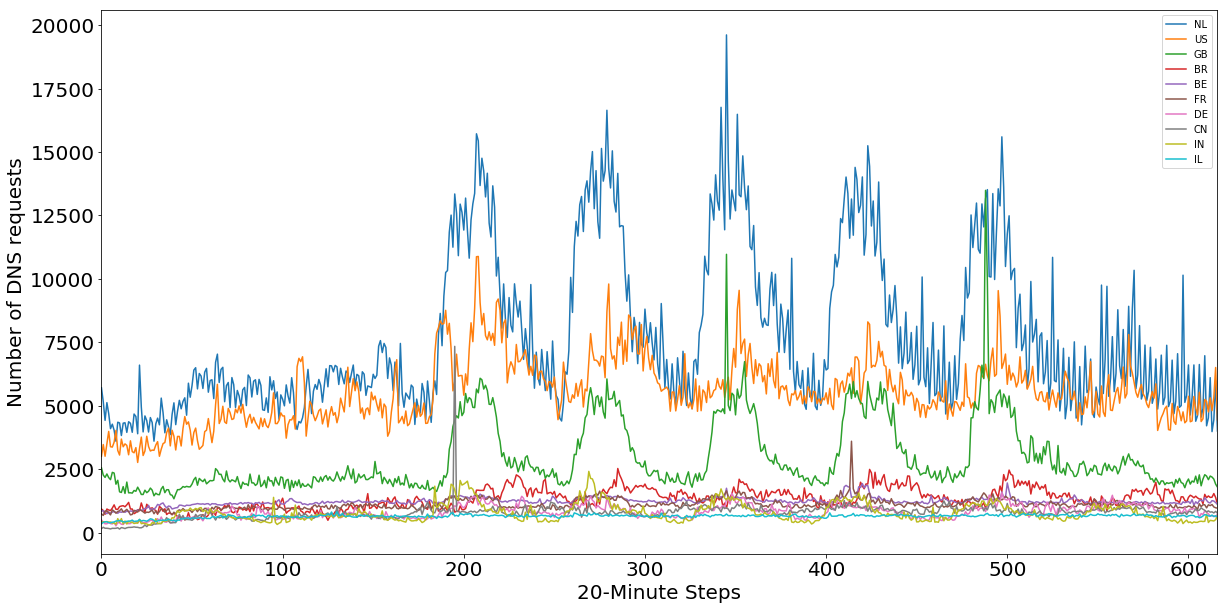

In [8]:
ax = new_df.plot(y = ["NL", "US", "GB", "BR", "BE", "FR", "DE", "CN", "IN", "IL"], figsize=(20,10), fontsize=20)
ax.set_xlabel("20-Minute Steps", fontsize=20)
ax.set_ylabel("Number of DNS requests", fontsize=20)
fig = ax.get_figure()
fig.savefig('../../Documents/Thesis/Pictures/Dataset/GoogleSet10CountriesFirstWeek.pdf')